# Why Logistic Regression?
"""
- Interpretability for healthcare applications  
- Handles binary classification well  
- Less prone to overfitting than complex models  
"""

In [1]:
# Logistic regression model to predict

import pandas as pd

file_path = '/content/drive/MyDrive/ML related datasets/diabetes.csv'
df = pd.read_csv(file_path)
print(df.head())
print('\n',df.shape)
print('\n',df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

 (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose           

In [2]:
# checking if null values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
# if null exist handling it using mode() method
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)

In [5]:
# dropping outcome column from dataframe and storing it as y
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [6]:
# applyiung z_score scalling(standard scaling technique)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)


In [8]:
# training model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Model Evaluation (lets check our model how it performs)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy : .2f}")

# classification report
print("\n classification report")
print(classification_report(y_test, y_pred))

# confusion matrix
print("\n confusion matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.75

 classification report
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


 confusion matrix
[[79 20]
 [18 37]]


<Axes: >

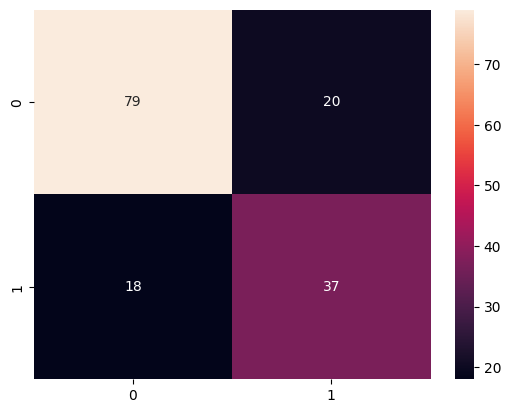

In [12]:
# visualizing its heatmap
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

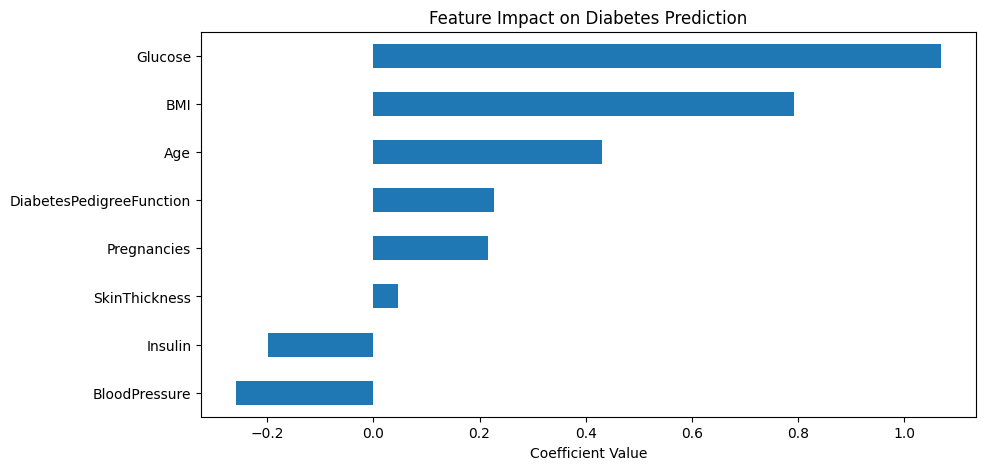

In [14]:
# Feature Importance Visualization (Add after model training)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
pd.Series(model.coef_[0], index=df.columns[:-1]).sort_values().plot(kind='barh')
plt.title("Feature Impact on Diabetes Prediction")
plt.xlabel("Coefficient Value")
plt.show()